C:\Users\robot\code\ml\landsat\collate_validation_metrics.py

In [27]:
!conda info


     active environment : tf_grid2.13
    active env location : C:\Users\robot\anaconda3\envs\tf_grid2.13
            shell level : 1
       user config file : C:\Users\robot\.condarc
 populated config files : C:\Users\robot\.condarc
          conda version : 23.7.4
    conda-build version : 3.26.1
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=x86_64
                          __cuda=12.6=0
                          __win=0=0
       base environment : C:\Users\robot\anaconda3  (writable)
      conda av data dir : C:\Users\robot\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.an

In [28]:
import os
import pandas as pd
import math
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown
%matplotlib inline

# Disable scientific notation for pandas display
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [29]:
# Directory path to search through
directory_ = r'H:\biomass'
model_run = "test_train_mlp"
model_run = "model_all01_02_03_04_05_06_v5"

directory_path = os.path.join(directory_, f"{model_run}")

combined_df = pd.read_csv(os.path.join(directory_path, "total_metrics.csv"))

## Split into groups based on status

In [30]:
retrain_df = combined_df[combined_df["status"]=="retrain"]
retest_df = combined_df[combined_df["status"]=="retest"]

In [31]:
retest_df

,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,fac,stdev,sel_num,data,stats,features,model,csv_path,file
0,0.6200000000,24588064.2500000000,4958.6400000000,3340.7300000000,111986906.7999999970,-174.5500000000,34,RFR,retest,all02_rs10,r2,3,40,all0,mean,"['dbifmdry_r43', 'dbifmdry_GNDVI', 'dbifmdry_N...","RandomForestRegressor(bootstrap=False, max_dep...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_r2_RFR_sel_40_variable_score.csv
1,0.7000000000,19254212.3799999990,4387.9600000000,3023.7600000000,104523606.2699999958,-25.2600000000,34,RFR,retest,all02_rs10,r2,3,25,all0,mean,"['b1_hmc_mean', 'b1_hsd_mean', 'b1_ccw_dry_mea...","RandomForestRegressor(bootstrap=False, max_dep...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_r2_RFR_sel_25_variable_score.csv
2,0.6600000000,21689359.8900000006,4657.1800000000,3217.9200000000,114316296.4699999988,127.9500000000,34,RFR,retest,all02_rs10,r2,3,20,all0,mean,"['dbifman_GNDVI', 'b5_dbifm_mean', 'b2_dbifm_m...","RandomForestRegressor(bootstrap=False, max_dep...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_r2_RFR_sel_20_variable_score.csv
3,0.7100000000,18559615.6200000010,4308.0900000000,3040.1800000000,124822096.0900000036,-176.5600000000,34,RFR,retest,all02_rs10,r2,3,15,all0,mean,"['b3_dbifm_mean', 'dbifmdry_GNDVI', 'b1_hsd_me...","RandomForestRegressor(bootstrap=False, max_dep...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_r2_RFR_sel_15_variable_score.csv
4,0.7200000000,18051775.9400000013,4248.7400000000,3099.9300000000,100173356.4899999946,-390.5900000000,34,RFR,retest,all02_rs10,r2,3,12,all0,mean,"['b1_ccw_dry_mean', 'b2_dp1fm_mean', 'b1_wfp_d...","RandomForestRegressor(bootstrap=False, max_dep...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.4800000000,33258201.4100000001,5766.9900000000,3787.4100000000,102620686.7999999970,-1163.6600000000,34,GBR,retest,all03_rs10,RMSE,3,25,all0,p99,"['b1_ccw_dry_p99', 'b1_hmc_p99', 'b1_hsd_p99',...",GradientBoostingRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all03_rs10_RMSE_GBR_sel_25_variable_score.csv
1244,0.4300000000,36737192.3400000036,6061.1200000000,4137.0900000000,78529891.6599999964,-1283.1900000000,34,GBR,retest,all03_rs10,RMSE,3,20,all0,p99,"['dbifman_NBR', 'b1_ccw_dry_p99', 'b1_h99_p99'...",GradientBoostingRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all03_rs10_RMSE_GBR_sel_20_variable_score.csv
1245,0.3300000000,43291494.8100000024,6579.6300000000,4553.3500000000,107986843.8299999982,-693.0400000000,34,GBR,retest,all03_rs10,RMSE,3,15,all0,p99,"['b1_dbifm_p99', 'b5_dbifm_p99', 'b2_dp1fm_p99...",GradientBoostingRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all03_rs10_RMSE_GBR_sel_15_variable_score.csv
1246,0.6200000000,24583883.8700000010,4958.2100000000,3463.9600000000,263661031.9600000083,-281.0600000000,34,GBR,retest,all03_rs10,RMSE,3,12,all0,p99,"['b1_dp1fm_p99', 'b1_dp1fm_dry_p99', 'b3_dp1fm...",GradientBoostingRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all03_rs10_RMSE_GBR_sel_12_variable_score.csv


In [32]:
# Load the dataset into a DataFrame
df = retest_df.copy()

var_ = 'all02_rs10'
df = df[df["var"]==var_]

# Sort the DataFrame by RMSE in ascending order
sorted_df = df.sort_values(by='rmse', ascending=True)

# Select the top 10 rows with the smallest RMSE
top_10_models = sorted_df.head(10)

Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\MAE\sel_num_12': ['AGB_all02_rs10_MAE_GBR_sel_12_variable_score.csv', 'AGB_all02_rs10_MAE_GBR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_MAE_GBR_sel_12_variable_score.JPG', 'AGB_all02_rs10_MAE_GBR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_GBR_MAE_top_12_retrain.JPG', 'AGB_all02_rs10_GBR_MAE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_GBR_MAE_top_12_retest.JPG', 'AGB_all02_rs10_GBR_MAE_top_12_retest_metrics.csv', 'AGB_all02_rs10_GBR_MAE_top_12_retest_predicted_data.csv']


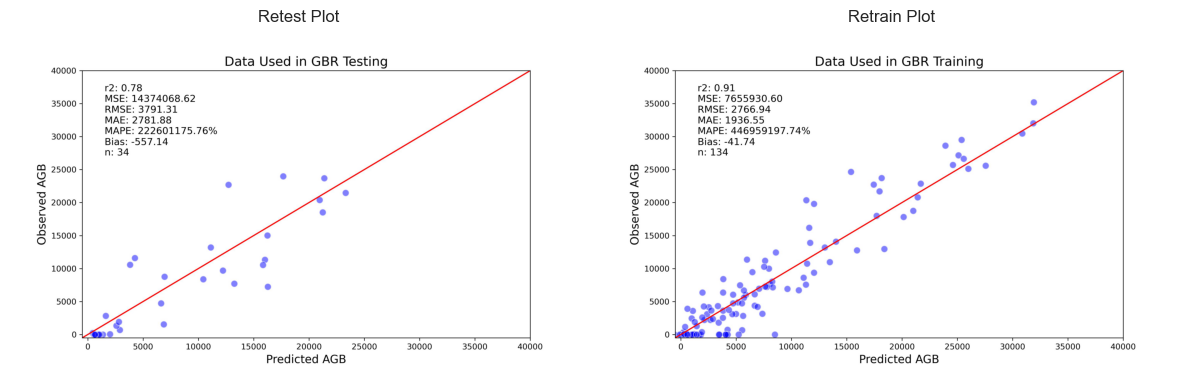

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\MAE\sel_num_12\AGB_all02_rs10_GBR_MAE_top_12_retest_metrics.csv
Retest Metrics:
 - RMSE: 3791.31
 - MAE: 2781.88
 - MAPE: 222601175.76
 - Bias: -557.14
 - R²: 0.78
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\MAE\sel_num_12': ['AGB_all02_rs10_MAE_GBR_sel_12_variable_score.csv', 'AGB_all02_rs10_MAE_GBR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_MAE_GBR_sel_12_variable_score.JPG', 'AGB_all02_rs10_MAE_GBR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_GBR_MAE_top_12_retrain.JPG', 'AGB_all02_rs10_GBR_MAE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_GBR_MAE_top_12_retest.JPG', 'AGB_all02_rs10_GBR_MAE_top_12_retest_metrics.csv', 'AGB_all02_rs10_GBR_MAE_top_12_retest_predicted_data.csv']


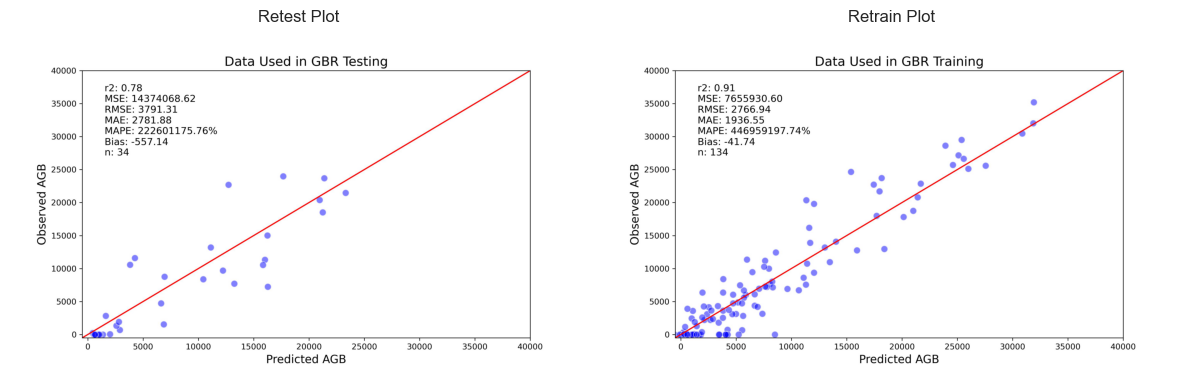

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\MAE\sel_num_12\AGB_all02_rs10_GBR_MAE_top_12_retest_metrics.csv
Retest Metrics:
 - RMSE: 3791.31
 - MAE: 2781.88
 - MAPE: 222601175.76
 - Bias: -557.14
 - R²: 0.78
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_GBR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_GBR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_GBR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_GBR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_GBR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_GBR_RMSE_top_12_retest_predicted_data.csv']


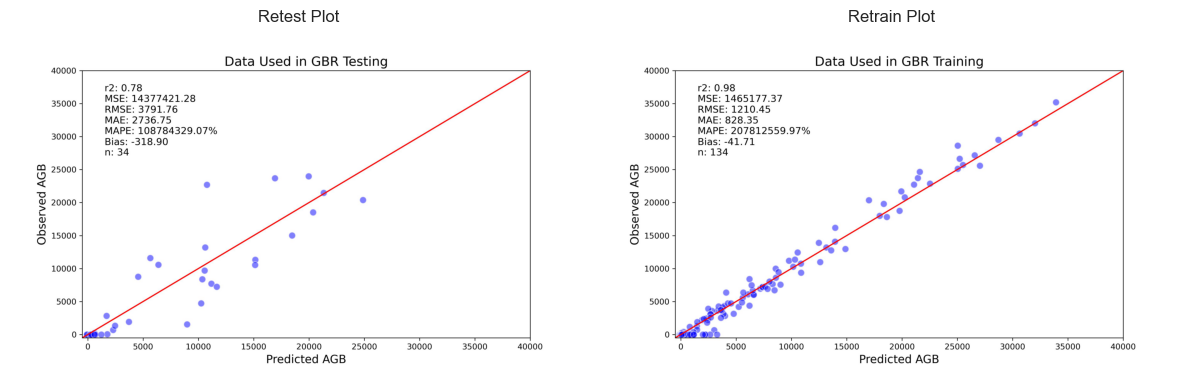

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_GBR_RMSE_top_12_retest_metrics.csv
Retest Metrics:
 - RMSE: 3791.76
 - MAE: 2736.75
 - MAPE: 108784329.07
 - Bias: -318.9
 - R²: 0.78
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_GBR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_GBR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_GBR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_GBR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_GBR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_GBR_RMSE_top_12_retest_predicted_data.csv']


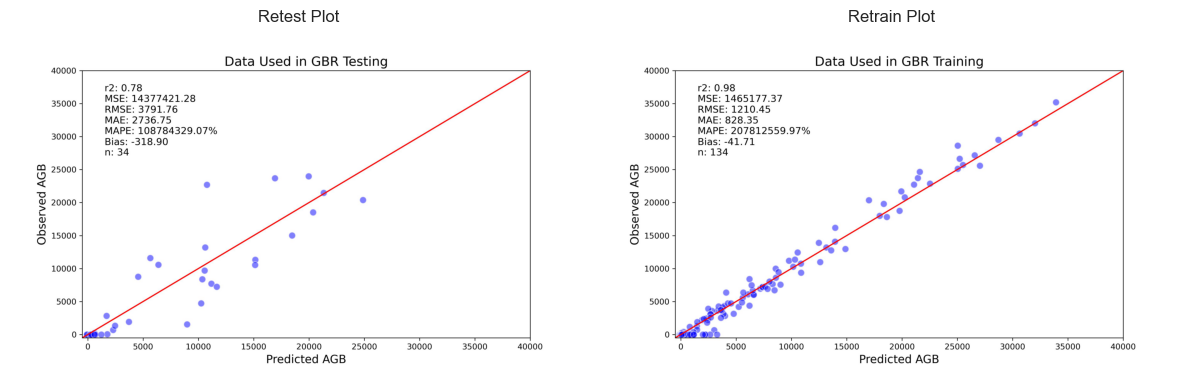

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_GBR_RMSE_top_12_retest_metrics.csv
Retest Metrics:
 - RMSE: 3791.76
 - MAE: 2736.75
 - MAPE: 108784329.07
 - Bias: -318.9
 - R²: 0.78
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_KNN_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_predicted_data.csv']


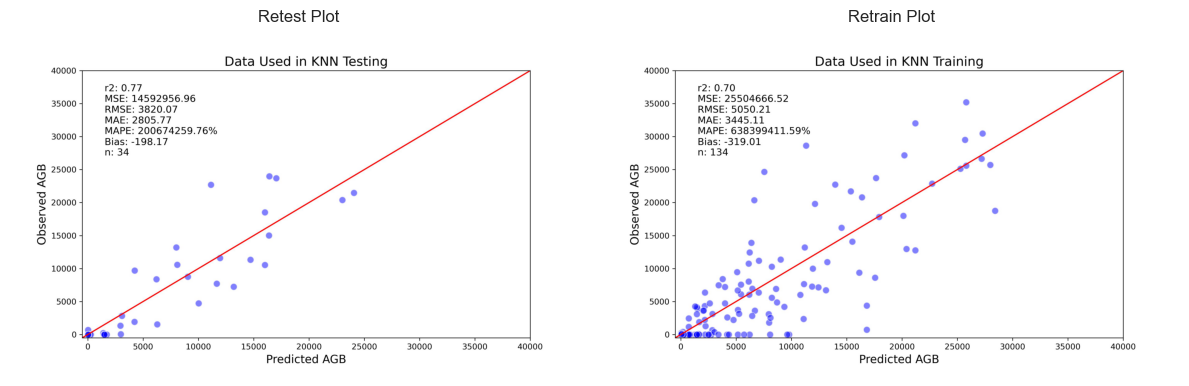

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv
Retest Metrics:
 - RMSE: 3820.07
 - MAE: 2805.77
 - MAPE: 200674259.76
 - Bias: -198.17
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_KNN_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_predicted_data.csv']


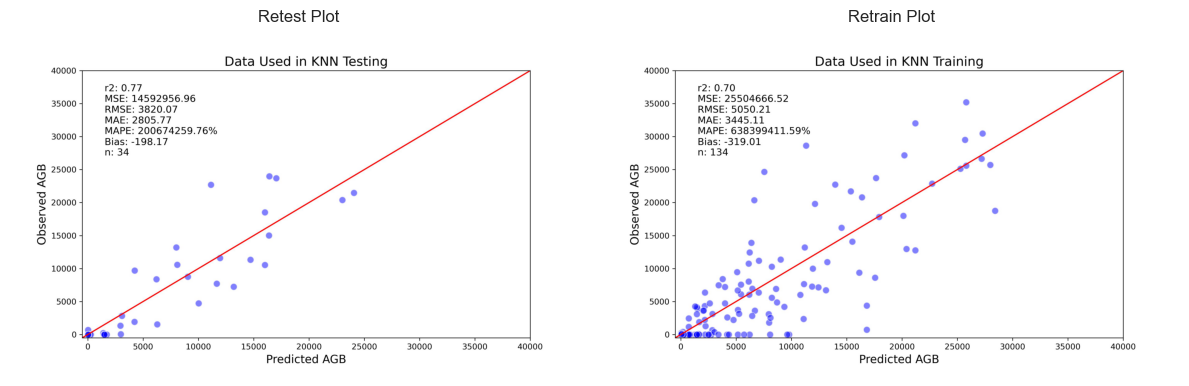

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv
Retest Metrics:
 - RMSE: 3820.07
 - MAE: 2805.77
 - MAPE: 200674259.76
 - Bias: -198.17
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_XGBR_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_predicted_data.csv']


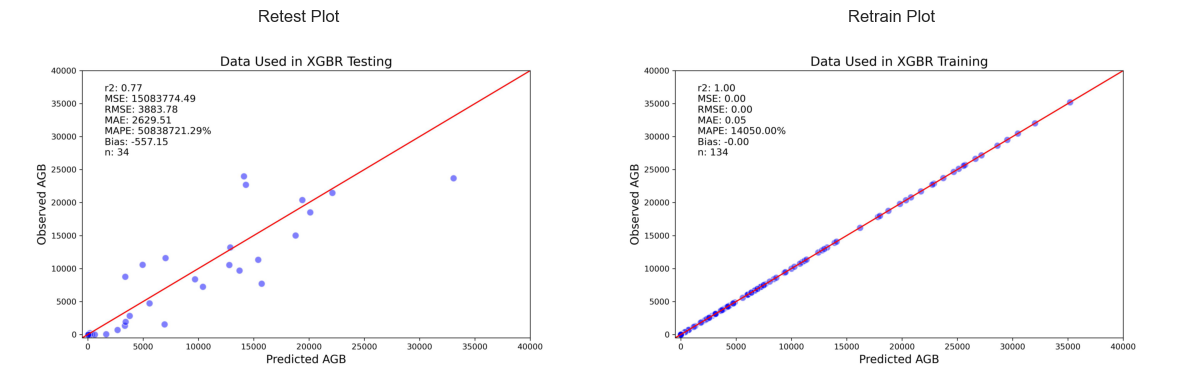

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv
Retest Metrics:
 - RMSE: 3883.78
 - MAE: 2629.51
 - MAPE: 50838721.29
 - Bias: -557.15
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_XGBR_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_predicted_data.csv']


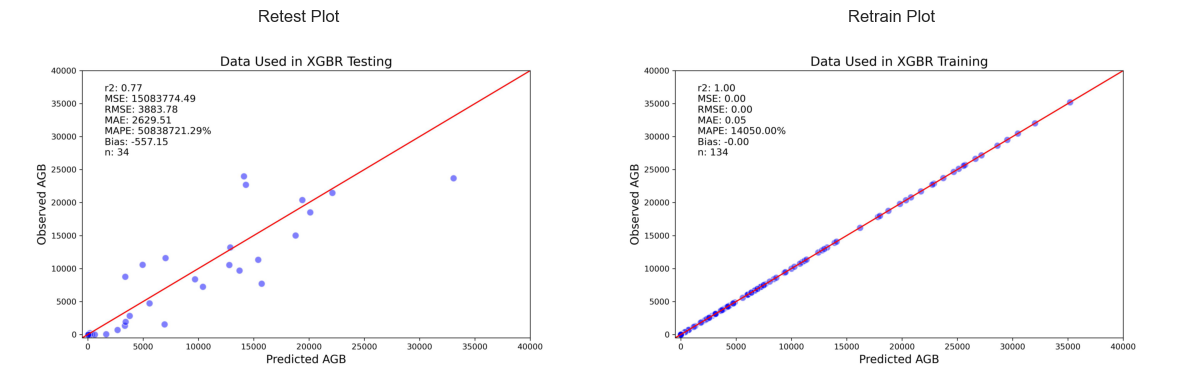

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv
Retest Metrics:
 - RMSE: 3883.78
 - MAE: 2629.51
 - MAPE: 50838721.29
 - Bias: -557.15
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_RFR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_predicted_data.csv']


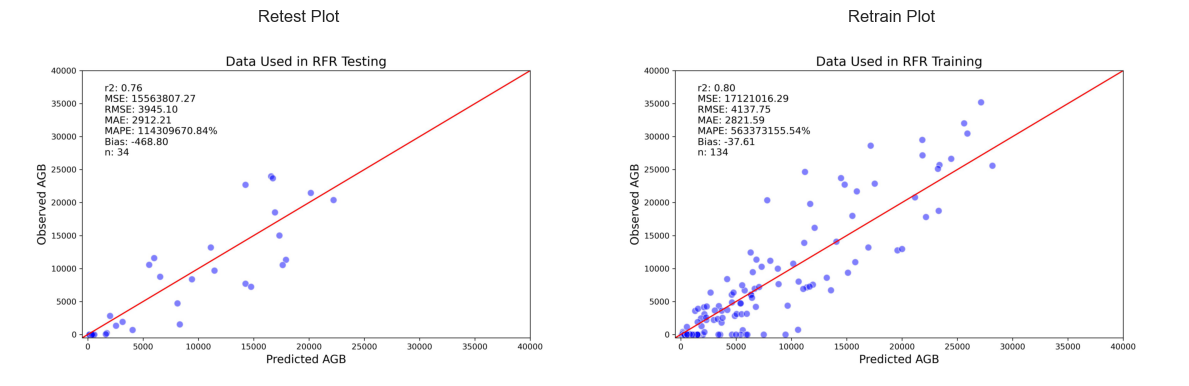

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv
Retest Metrics:
 - RMSE: 3945.1
 - MAE: 2912.21
 - MAPE: 114309670.84
 - Bias: -468.8
 - R²: 0.76
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_RFR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_predicted_data.csv']


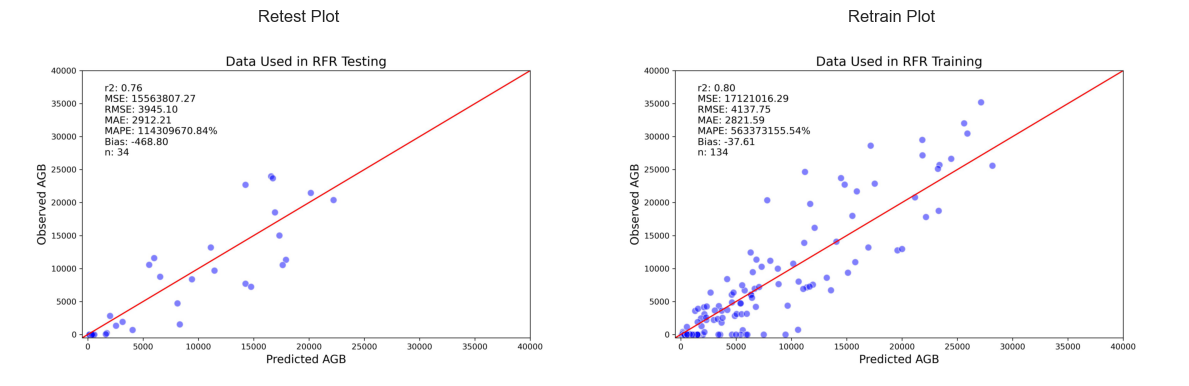

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv
Retest Metrics:
 - RMSE: 3945.1
 - MAE: 2912.21
 - MAPE: 114309670.84
 - Bias: -468.8
 - R²: 0.76
--------------------------------------------------
C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v5_all02_rs10_overall_best.csv


In [33]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for index, row in top_10_models.iterrows():
    csv_directory = os.path.dirname(row['csv_path'])

    # Debug: List all files in the directory
    print(f"Files in directory '{csv_directory}': {os.listdir(csv_directory)}")

    # Use glob to find retest and retrain plots
    retest_plot_files = glob.glob(os.path.join(csv_directory, "*retest.JPG"))
    retrain_plot_files = glob.glob(os.path.join(csv_directory, "*retrain.JPG"))

    if retest_plot_files and retrain_plot_files:
        # Take the first matching files
        retest_plot_path = retest_plot_files[0]
        retrain_plot_path = retrain_plot_files[0]

        # Plot the images side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        retest_img = mpimg.imread(retest_plot_path)
        axes[0].imshow(retest_img)
        axes[0].set_title("Retest Plot")
        axes[0].axis("off")

        retrain_img = mpimg.imread(retrain_plot_path)
        axes[1].imshow(retrain_img)
        axes[1].set_title("Retrain Plot")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

        # Print CSV path and metrics
        print(f"CSV Path: {row['csv_path']}")
        print(f"Retest Metrics:")
        print(f" - RMSE: {row['rmse']}")
        print(f" - MAE: {row['mae']}")
        print(f" - MAPE: {row['mape']}")
        print(f" - Bias: {row['bias']}")
        print(f" - R²: {row['r2']}")
        print("-" * 50)
    else:
        print(f"Missing plots for model: {row['file']}")
        if not retest_plot_files:
            print(" - Retest plot not found.")
        if not retrain_plot_files:
            print(" - Retrain plot not found.")
            
top_10_models.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_overall_best.csv".format(model_run, var_))
print(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_overall_best.csv".format(model_run, var_))


In [34]:
top_10_models

,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,fac,stdev,sel_num,data,stats,features,model,csv_path,file
202,0.7800000000,14374068.6199999992,3791.3100000000,2781.8800000000,222601175.7599999905,-557.1400000000,34,GBR,retest,all02_rs10,MAE,3,12,all0,p50,"['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_MAE_GBR_sel_12_variable_score.csv
826,0.7800000000,14374068.6199999992,3791.3100000000,2781.8800000000,222601175.7599999905,-557.1400000000,34,GBR,retest,all02_rs10,MAE,3,12,all0,p50,"['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_MAE_GBR_sel_12_variable_score.csv
832,0.7800000000,14377421.2799999993,3791.7600000000,2736.7500000000,108784329.0699999928,-318.9000000000,34,GBR,retest,all02_rs10,RMSE,3,12,all0,p50,"['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_GBR_sel_12_variable_score.csv
208,0.7800000000,14377421.2799999993,3791.7600000000,2736.7500000000,108784329.0699999928,-318.9000000000,34,GBR,retest,all02_rs10,RMSE,3,12,all0,p50,"['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_GBR_sel_12_variable_score.csv
909,0.7700000000,14592956.9600000009,3820.0700000000,2805.7700000000,200674259.7599999905,-198.1700000000,34,KNN,retest,all02_rs10,RMSE,3,15,all0,p50,"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1...",KNeighborsRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_KNN_sel_15_variable_score.csv
285,0.7700000000,14592956.9600000009,3820.0700000000,2805.7700000000,200674259.7599999905,-198.1700000000,34,KNN,retest,all02_rs10,RMSE,3,15,all0,p50,"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1...",KNeighborsRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_KNN_sel_15_variable_score.csv
981,0.7700000000,15083774.4900000002,3883.7800000000,2629.5100000000,50838721.2899999991,-557.1500000000,34,XGBR,retest,all02_rs10,RMSE,3,15,all0,p50,"['b1_ccw_dry_p50', 'b3_dp1fm_p50', 'b1_hcv_p50...","XGBRegressor(base_score=None, booster=None, ca...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_XGBR_sel_15_variable_score.csv
357,0.7700000000,15083774.4900000002,3883.7800000000,2629.5100000000,50838721.2899999991,-557.1500000000,34,XGBR,retest,all02_rs10,RMSE,3,15,all0,p50,"['b1_ccw_dry_p50', 'b3_dp1fm_p50', 'b1_hcv_p50...","XGBRegressor(base_score=None, booster=None, ca...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_XGBR_sel_15_variable_score.csv
688,0.7600000000,15563807.2699999996,3945.1000000000,2912.2100000000,114309670.8400000036,-468.8000000000,34,RFR,retest,all02_rs10,RMSE,3,12,all0,p50,"['b2_dbifm_p50', 'b2_dp1fm_dry_p50', 'b1_hcv_p...","RandomForestRegressor(max_depth=5, max_feature...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_RFR_sel_12_variable_score.csv
64,0.7600000000,15563807.2699999996,3945.1000000000,2912.2100000000,114309670.8400000036,-468.8000000000,34,RFR,retest,all02_rs10,RMSE,3,12,all0,p50,"['b2_dbifm_p50', 'b2_dp1fm_dry_p50', 'b1_hcv_p...","RandomForestRegressor(max_depth=5, max_feature...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_RFR_sel_12_variable_score.csv


In [35]:
# Find the model with the lowest RMSE
best_perform_model = top_10_models.loc[top_10_models['rmse'].idxmin()]

# Calculate summary statistics
summary_stats = top_10_models.describe()

# Output results
print("Summary Statistics:")
print(summary_stats)
print("\nModel with the Lowest RMSE:")
print(best_perform_model)

Summary Statistics:
                 r2                 mse            rmse             mae  \
count 10.0000000000       10.0000000000   10.0000000000   10.0000000000   
mean   0.7720000000 14798405.7240000013 3846.4040000000 2773.2240000000   
std    0.0078881064   486888.9752015744   62.9861729447   97.1085796873   
min    0.7600000000 14374068.6199999992 3791.3100000000 2629.5100000000   
25%    0.7700000000 14377421.2799999993 3791.7600000000 2736.7500000000   
50%    0.7700000000 14592956.9600000009 3820.0700000000 2781.8800000000   
75%    0.7800000000 15083774.4900000002 3883.7800000000 2805.7700000000   
max    0.7800000000 15563807.2699999996 3945.1000000000 2912.2100000000   

                      mape            bias             n         stdev  \
count        10.0000000000   10.0000000000 10.0000000000 10.0000000000   
mean  139441631.3439999819 -420.0320000000 34.0000000000  3.0000000000   
std    66811352.8305878490  148.6447636182  0.0000000000  0.0000000000   
min    5

In [36]:
# Normalise metrics
sorted_df['RMSE_norm'] = sorted_df['rmse'] / sorted_df['rmse'].max()  # Lower is better
sorted_df['MAE_norm'] = sorted_df['mae'] / sorted_df['mae'].max()    # Lower is better
sorted_df['R2_norm'] = 1 - ((sorted_df['r2'].max() - sorted_df['r2']) / (sorted_df['r2'].max() - sorted_df['r2'].min()))  # Higher is better

# Assign weights to each metric (optional)
weights = {'rmse': 0.8, 'mae': 0.1, 'r2': 0.1}

# Calculate combined score
sorted_df['Score'] = (
    sorted_df['RMSE_norm'] * weights['rmse'] +
    sorted_df['MAE_norm'] * weights['mae'] +
    sorted_df['R2_norm'] * weights['r2']
)

# Rank models based on the score
sorted_df['Rank'] = sorted_df['Score'].rank(ascending=True)

# Sort by rank
df_rank = sorted_df.sort_values(by='Rank')

# Output results
df_rank[['mdl', 'rmse', 'mae', 'r2', 'Score', 'Rank', 'csv_path', 'model', 'features']]

,mdl,rmse,mae,r2,Score,Rank,csv_path,model,features
832,GBR,3791.7600000000,2736.7500000000,0.7800000000,0.4105963541,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',..."
208,GBR,3791.7600000000,2736.7500000000,0.7800000000,0.4105963541,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',..."
202,GBR,3791.3100000000,2781.8800000000,0.7800000000,0.4111579927,3.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d..."
826,GBR,3791.3100000000,2781.8800000000,0.7800000000,0.4111579927,3.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d..."
909,KNN,3820.0700000000,2805.7700000000,0.7700000000,0.4129598273,5.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,KNeighborsRegressor(),"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1..."
...,...,...,...,...,...,...,...,...,...
421,MLP,11048.0900000000,7594.6000000000,-0.9000000000,0.8999909814,859.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['dbifmdry_CVI', 'dbifmdry_MSR', 'b6_dbifm_p50..."
1035,MLP,11048.1100000000,7594.7900000000,-0.9000000000,0.8999949313,861.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b2_dp1fm_dry_p50', 'b3_dp1fm_p50', 'b1_ccw_d..."
411,MLP,11048.1100000000,7594.7900000000,-0.9000000000,0.8999949313,861.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b2_dp1fm_dry_p50', 'b3_dp1fm_p50', 'b1_ccw_d..."
400,MLP,11048.1800000000,7594.7500000000,-0.9000000000,0.8999994733,863.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b2_dp1fm_dry_p99', 'b3_dp1fm_dry_p99', 'b1_h..."


In [37]:
# Normalise metrics
sorted_df['RMSE_norm'] = sorted_df['rmse'] / sorted_df['rmse'].max()  # Lower is better
sorted_df['MAE_norm'] = sorted_df['mae'] / sorted_df['mae'].max()    # Lower is better
sorted_df['R2_norm'] = 1 - ((sorted_df['r2'].max() - sorted_df['r2']) / (sorted_df['r2'].max() - sorted_df['r2'].min()))  # Higher is better
sorted_df['Bias_norm'] = abs(sorted_df['bias']) / abs(sorted_df['bias']).max()  # Lower absolute bias is better

# Assign weights to each metric (adjust as needed)
weights = {'rmse': 0.7, 'mae': 0.1, 'r2': 0.1, 'bias': 0.1}

# Calculate combined score
sorted_df['Score'] = (
    sorted_df['RMSE_norm'] * weights['rmse'] +
    sorted_df['MAE_norm'] * weights['mae'] +
    sorted_df['R2_norm'] * weights['r2'] +
    sorted_df['Bias_norm'] * weights['bias']
)

# Rank models based on the score
sorted_df['Rank'] = sorted_df['Score'].rank(ascending=True)

# Sort by rank
df_rank = sorted_df.sort_values(by='Rank')

# Output results
df_rank[['mdl', 'rmse', 'mae', 'r2', 'bias', 'Score', 'Rank', 'csv_path', 'model', 'features']]


,mdl,rmse,mae,r2,bias,Score,Rank,csv_path,model,features
832,GBR,3791.7600000000,2736.7500000000,0.7800000000,-318.9000000000,0.3804750623,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',..."
208,GBR,3791.7600000000,2736.7500000000,0.7800000000,-318.9000000000,0.3804750623,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',..."
909,KNN,3820.0700000000,2805.7700000000,0.7700000000,-198.1700000000,0.3809926518,3.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,KNeighborsRegressor(),"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1..."
285,KNN,3820.0700000000,2805.7700000000,0.7700000000,-198.1700000000,0.3809926518,3.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,KNeighborsRegressor(),"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1..."
202,GBR,3791.3100000000,2781.8800000000,0.7800000000,-557.1400000000,0.3841776612,5.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d..."
...,...,...,...,...,...,...,...,...,...,...
421,MLP,11048.0900000000,7594.6000000000,-0.9000000000,7594.2200000000,0.8999842908,859.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['dbifmdry_CVI', 'dbifmdry_MSR', 'b6_dbifm_p50..."
1035,MLP,11048.1100000000,7594.7900000000,-0.9000000000,7594.7900000000,0.8999955649,861.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b2_dp1fm_dry_p50', 'b3_dp1fm_p50', 'b1_ccw_d..."
411,MLP,11048.1100000000,7594.7900000000,-0.9000000000,7594.7900000000,0.8999955649,861.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b2_dp1fm_dry_p50', 'b3_dp1fm_p50', 'b1_ccw_d..."
400,MLP,11048.1800000000,7594.7500000000,-0.9000000000,7594.7500000000,0.8999989466,863.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b2_dp1fm_dry_p99', 'b3_dp1fm_dry_p99', 'b1_h..."


In [38]:
# Group by 'mdl' and get the best rank (minimum score) per model
best_rank_per_model = df_rank.groupby('mdl', as_index=False).first()

# Sort the models by Rank for clear display
best_rank_per_model = best_rank_per_model.sort_values(by='Rank')

# Output the results
print("Best Rank for Each Model:")
best_rank_per_model[['mdl', 'rmse', 'mae', 'r2', 'Score', 'Rank', 'csv_path', 'model', 'features']]


Best Rank for Each Model:


,mdl,rmse,mae,r2,Score,Rank,csv_path,model,features
1,GBR,3791.7600000000,2736.7500000000,0.7800000000,0.3804750623,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',..."
2,KNN,3820.0700000000,2805.7700000000,0.7700000000,0.3809926518,3.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,KNeighborsRegressor(),"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1..."
5,XGBR,3883.7800000000,2629.5100000000,0.7700000000,0.3874351041,9.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"XGBRegressor(base_score=None, booster=None, ca...","['b1_ccw_dry_p50', 'b3_dp1fm_p50', 'b1_hcv_p50..."
4,RFR,3945.1000000000,2912.2100000000,0.7600000000,0.3932840219,13.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"RandomForestRegressor(max_depth=5, max_feature...","['b2_dbifm_p50', 'b2_dp1fm_dry_p50', 'b1_hcv_p..."
0,ABR,4074.2600000000,2865.2000000000,0.7400000000,0.3986416434,31.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,AdaBoostRegressor(estimator=DecisionTreeRegres...,"['b1_hcv_p50', 'b1_dp1fm_dry_p50', 'b1_hmc_p50..."
3,MLP,8321.6500000000,5662.5800000000,-0.0800000000,0.7183772759,721.5000000000,H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b1_h25_mean', 'b1_hmc_mean', 'dbifmdry_MSR',..."


In [39]:
# Group by 'mdl' and find the row with the minimum 'rmse' for each model
lowest_rmse_df = sorted_df.loc[sorted_df.groupby('mdl')['rmse'].idxmin()]
# Reset index for cleaner presentation
lowest_rmse_df = lowest_rmse_df.reset_index(drop=True)

# Display the table with the lowest RMSE per model
print("Table of Lowest RMSE for Each Model:")
lowest_rmse_df

Table of Lowest RMSE for Each Model:


,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,...,features,model,csv_path,file,RMSE_norm,MAE_norm,R2_norm,Score,Rank,Bias_norm
0,0.7500000000,16214998.1300000008,4026.7900000000,3156.6500000000,662122987.3899999857,-1249.4700000000,34,ABR,retest,all02_rs10,...,"['b1_hcv_p50', 'b1_hmc_p50', 'b1_dp1fm_dry_p50...",AdaBoostRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_ABR_sel_12_variable_score.csv,0.3644754159,0.4156336120,0.9821428571,0.4113621108,77.5000000000,0.1645167279
1,0.7800000000,14374068.6199999992,3791.3100000000,2781.8800000000,222601175.7599999905,-557.1400000000,34,GBR,retest,all02_rs10,...,"['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_MAE_GBR_sel_12_variable_score.csv,0.3431614981,0.3662879421,1.0000000000,0.3841776612,5.5000000000,0.0733581837
2,0.7700000000,14592956.9600000009,3820.0700000000,2805.7700000000,200674259.7599999905,-198.1700000000,34,KNN,retest,all02_rs10,...,"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1...",KNeighborsRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_KNN_sel_15_variable_score.csv,0.3457646418,0.3694335196,0.9940476190,0.3809926518,3.5000000000,0.0260928874
3,-0.0800000000,69249795.9300000072,8321.6500000000,5662.5800000000,235740552.8300000131,5146.1400000000,34,MLP,retest,all02_rs10,...,"['b1_h25_mean', 'b1_hmc_mean', 'dbifmdry_MSR',...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_MLP_sel_40_variable_score.csv,0.7532145566,0.7455874356,0.4880952381,0.7183772759,721.5000000000,0.6775881887
4,0.7600000000,15563807.2699999996,3945.1000000000,2912.2100000000,114309670.8400000036,-468.8000000000,34,RFR,retest,all02_rs10,...,"['b2_dbifm_p50', 'b2_dp1fm_dry_p50', 'b1_hcv_p...","RandomForestRegressor(max_depth=5, max_feature...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_RFR_sel_12_variable_score.csv,0.3570814378,0.3834483903,0.9880952381,0.3932840219,13.5000000000,0.0617265257
5,0.7700000000,15083774.4900000002,3883.7800000000,2629.5100000000,50838721.2899999991,-557.1500000000,34,XGBR,retest,all02_rs10,...,"['b1_ccw_dry_p50', 'b3_dp1fm_p50', 'b1_hcv_p50...","XGBRegressor(base_score=None, booster=None, ca...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_XGBR_sel_15_variable_score.csv,0.3515312024,0.3462255046,0.9940476190,0.3874351041,9.5000000000,0.0733595004


In [40]:
best_rank_per_model.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_AGB_best_model_results.csv".format(model_run, var_))
#best_rank_per_model.to_csv(r"H:\biomass\model_test_train_all01_02_03_04_05_06_final\AGB_best_model_results_rs30_all01.csv", index=False)
print(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_AGB_best_model_results.csv".format(model_run, var_))

C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v5_all02_rs10_AGB_best_model_results.csv


In [41]:
# Group by 'mdl' to calculate the mean rank and mean score for each model type
overall_ranking = df_rank.groupby('mdl', as_index=False).agg({
    'Score': 'mean',  # Average score
    'Rank': 'mean'    # Average rank
}).sort_values(by='Rank')  # Sort by mean rank

# Rename columns for clarity
overall_ranking = overall_ranking.rename(columns={'Score': 'Mean_Score', 'Rank': 'Mean_Rank'})

# Display the overall ranking
print("Overall Model Performance:")
overall_ranking.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_AGB_overall_ranking_results.csv".format(model_run, var_))
print("output to: ", r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_AGB_overall_ranking_results.csv".format(model_run, var_))
overall_ranking


Overall Model Performance:
output to:  C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v5_all02_rs10_AGB_overall_ranking_results.csv


,mdl,Mean_Score,Mean_Rank
4,RFR,0.4280531337,183.9444444444
1,GBR,0.4470786865,313.3055555556
2,KNN,0.4621509143,397.1944444444
0,ABR,0.4703778651,450.8333333333
5,XGBR,0.4804876242,457.2222222222
3,MLP,0.8740402543,792.5000000000


In [42]:
grouped_df = sorted_df.groupby(['mdl'])[['rmse', 'r2', 'mae']].agg(['mean', 'std']).reset_index()
grouped_df.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_AGB_grouped_ranking_results.csv".format(model_run, var_))
print("output to: ", r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_AGB_grouped_ranking_results.csv".format(model_run, var_))
grouped_df


output to:  C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v5_all02_rs10_AGB_grouped_ranking_results.csv


mdl             rmse                           r2               \
                    mean            std          mean          std   
0   ABR  5082.5976388889 484.0593770678  0.5948611111 0.0762952135   
1   GBR  4826.1341666667 524.3227594743  0.6347222222 0.0797193016   
2   KNN  5105.4425000000 482.9158843252  0.5905555556 0.0776920384   
3   MLP 10650.0133333333 752.4017694908 -0.7741666667 0.2349988841   
4   RFR  4554.3623611111 332.7840214506  0.6762500000 0.0474360077   
5  XGBR  5352.0847222222 853.0141179903  0.5437500000 0.1554010152   

              mae                 
             mean            std  
0 3688.4029166667 434.0950782143  
1 3266.5027777778 307.7134297495  
2 3411.0265277778 256.8368468498  
3 7312.0963888889 535.6094138398  
4 3119.3148611111 163.9192830104  
5 3648.6395833333 473.7974698573

In [43]:
sorted_df

,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,...,features,model,csv_path,file,RMSE_norm,MAE_norm,R2_norm,Score,Rank,Bias_norm
202,0.7800000000,14374068.6199999992,3791.3100000000,2781.8800000000,222601175.7599999905,-557.1400000000,34,GBR,retest,all02_rs10,...,"['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_MAE_GBR_sel_12_variable_score.csv,0.3431614981,0.3662879421,1.0000000000,0.3841776612,5.5000000000,0.0733581837
826,0.7800000000,14374068.6199999992,3791.3100000000,2781.8800000000,222601175.7599999905,-557.1400000000,34,GBR,retest,all02_rs10,...,"['b1_dp1fm_dry_p50', 'b3_dp1fm_dry_p50', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_MAE_GBR_sel_12_variable_score.csv,0.3431614981,0.3662879421,1.0000000000,0.3841776612,5.5000000000,0.0733581837
832,0.7800000000,14377421.2799999993,3791.7600000000,2736.7500000000,108784329.0699999928,-318.9000000000,34,GBR,retest,all02_rs10,...,"['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_GBR_sel_12_variable_score.csv,0.3432022288,0.3603457107,1.0000000000,0.3804750623,1.5000000000,0.0419893111
208,0.7800000000,14377421.2799999993,3791.7600000000,2736.7500000000,108784329.0699999928,-318.9000000000,34,GBR,retest,all02_rs10,...,"['b1_dp1fm_p50', 'b3_dp1fm_p50', 'b1_h99_p50',...","GradientBoostingRegressor(learning_rate=0.05, ...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_GBR_sel_12_variable_score.csv,0.3432022288,0.3603457107,1.0000000000,0.3804750623,1.5000000000,0.0419893111
909,0.7700000000,14592956.9600000009,3820.0700000000,2805.7700000000,200674259.7599999905,-198.1700000000,34,KNN,retest,all02_rs10,...,"['b2_dp1fm_dry_p50', 'b1_wfp_dry_p50', 'b2_dp1...",KNeighborsRegressor(),H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_KNN_sel_15_variable_score.csv,0.3457646418,0.3694335196,0.9940476190,0.3809926518,3.5000000000,0.0260928874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-0.9000000000,122060368.1299999952,11048.0900000000,7594.6000000000,190879.7400000000,7594.2200000000,34,MLP,retest,all02_rs10,...,"['dbifmdry_CVI', 'dbifmdry_MSR', 'b6_dbifm_p50...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_MLP_sel_25_variable_score.csv,0.9999918539,0.9999749829,0.0000000000,0.8999842908,859.5000000000,0.9999249486
1035,-0.9000000000,122060726.2900000066,11048.1100000000,7594.7900000000,225771.4700000000,7594.7900000000,34,MLP,retest,all02_rs10,...,"['b2_dp1fm_dry_p50', 'b3_dp1fm_p50', 'b1_ccw_d...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_r2_MLP_sel_15_variable_score.csv,0.9999936641,1.0000000000,0.0000000000,0.8999955649,861.5000000000,1.0000000000
411,-0.9000000000,122060726.2900000066,11048.1100000000,7594.7900000000,225771.4700000000,7594.7900000000,34,MLP,retest,all02_rs10,...,"['b2_dp1fm_dry_p50', 'b3_dp1fm_p50', 'b1_ccw_d...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_r2_MLP_sel_15_variable_score.csv,0.9999936641,1.0000000000,0.0000000000,0.8999955649,861.5000000000,1.0000000000
400,-0.9000000000,122062186.5999999940,11048.1800000000,7594.7500000000,164302.8700000000,7594.7500000000,34,MLP,retest,all02_rs10,...,"['b2_dp1fm_dry_p99', 'b3_dp1fm_dry_p99', 'b1_h...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v5\AGB\a...,all02_rs10_RMSE_MLP_sel_12_variable_score.csv,1.0000000000,0.9999947332,0.0000000000,0.8999989466,863.5000000000,0.9999947332


Top Two Ranks for Each Model:
     mdl            rmse             mae            r2        Score  \
2    GBR 3791.7600000000 2736.7500000000  0.7800000000 0.3804750623   
3    GBR 3791.7600000000 2736.7500000000  0.7800000000 0.3804750623   
4    KNN 3820.0700000000 2805.7700000000  0.7700000000 0.3809926518   
5    KNN 3820.0700000000 2805.7700000000  0.7700000000 0.3809926518   
10  XGBR 3883.7800000000 2629.5100000000  0.7700000000 0.3874351041   
11  XGBR 3883.7800000000 2629.5100000000  0.7700000000 0.3874351041   
8    RFR 3945.1000000000 2912.2100000000  0.7600000000 0.3932840219   
9    RFR 3945.1000000000 2912.2100000000  0.7600000000 0.3932840219   
0    ABR 4074.2600000000 2865.2000000000  0.7400000000 0.3986416434   
1    ABR 4074.2600000000 2865.2000000000  0.7400000000 0.3986416434   
6    MLP 8321.6500000000 5662.5800000000 -0.0800000000 0.7183772759   
7    MLP 8321.6500000000 5662.5800000000 -0.0800000000 0.7183772759   

             Rank                             

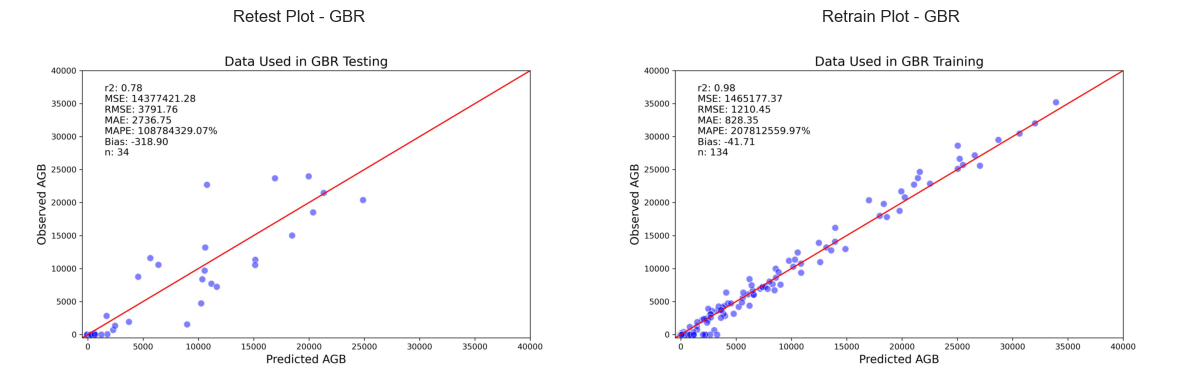

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_GBR_RMSE_top_12_retest_metrics.csv
Metrics for Model 'GBR':
 - RMSE: 3791.76
 - MAE: 2736.75
 - Bias: -318.9
 - R²: 0.78
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_GBR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_GBR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_GBR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_GBR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_GBR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_GBR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_GBR_RMSE_top_12_retest_predicted_data.csv']


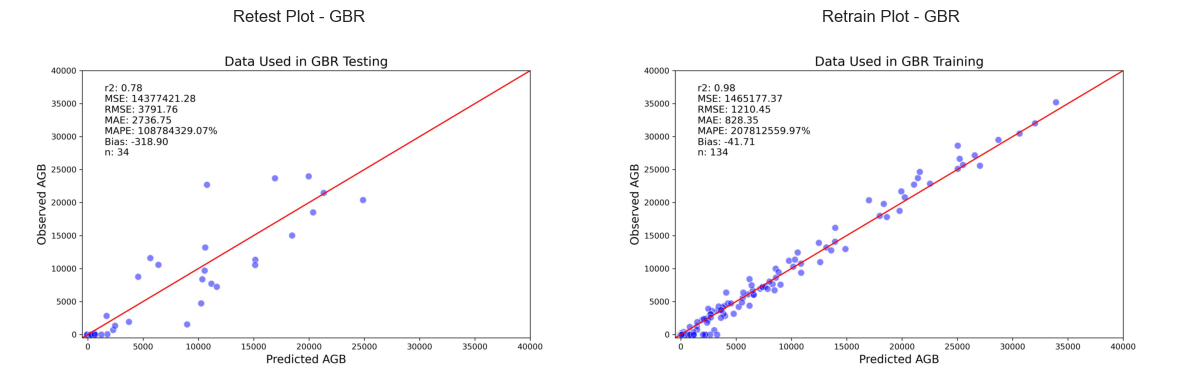

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\GBR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_GBR_RMSE_top_12_retest_metrics.csv
Metrics for Model 'GBR':
 - RMSE: 3791.76
 - MAE: 2736.75
 - Bias: -318.9
 - R²: 0.78
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_KNN_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_predicted_data.csv']


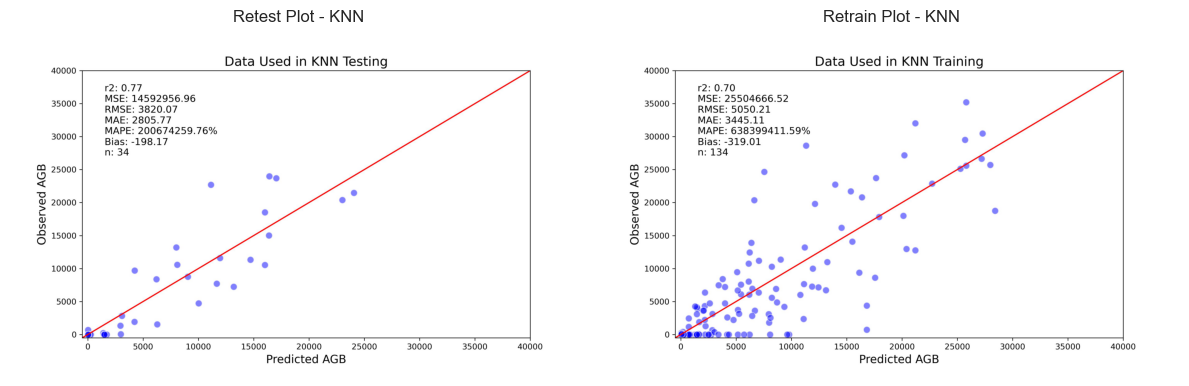

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv
Metrics for Model 'KNN':
 - RMSE: 3820.07
 - MAE: 2805.77
 - Bias: -198.17
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_KNN_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_KNN_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_KNN_RMSE_top_15_retest_predicted_data.csv']


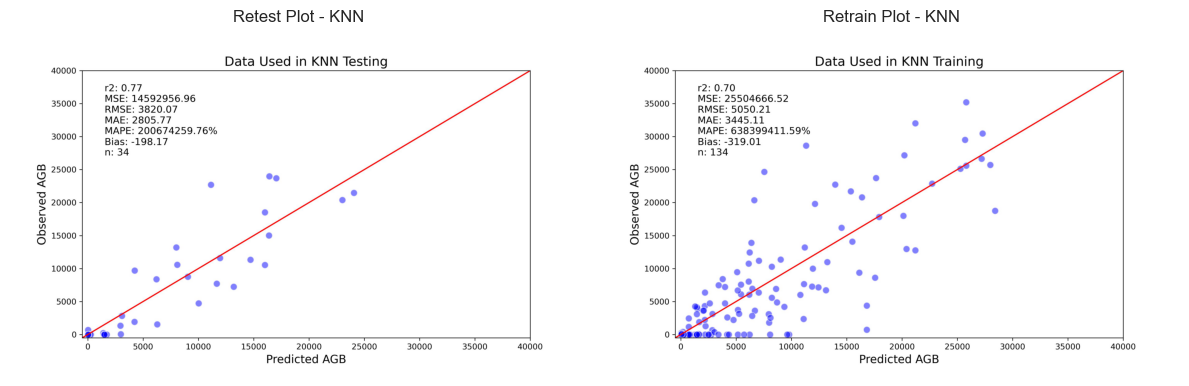

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\KNN\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_KNN_RMSE_top_15_retest_metrics.csv
Metrics for Model 'KNN':
 - RMSE: 3820.07
 - MAE: 2805.77
 - Bias: -198.17
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_XGBR_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_predicted_data.csv']


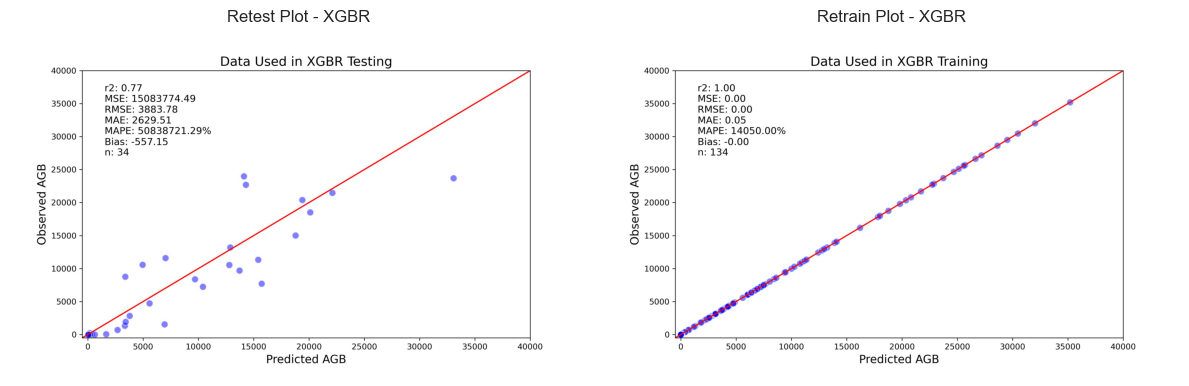

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv
Metrics for Model 'XGBR':
 - RMSE: 3883.78
 - MAE: 2629.51
 - Bias: -557.15
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15': ['AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_correlation.csv', 'AGB_all02_rs10_RMSE_XGBR_sel_15_variable_score.JPG', 'AGB_all02_rs10_RMSE_XGBR_Top_15_Feature_Importance_Score.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retrain_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest.JPG', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv', 'AGB_all02_rs10_XGBR_RMSE_top_15_retest_predicted_data.csv']


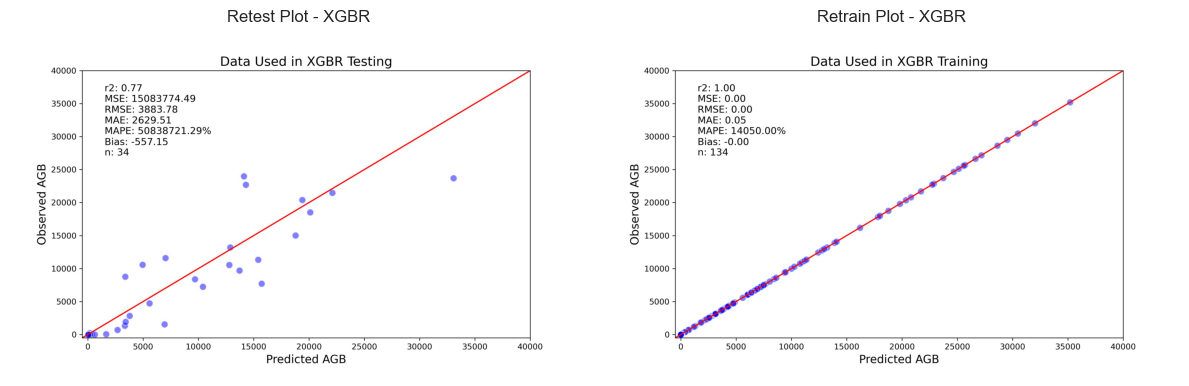

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\XGBR\p50\std3\all0\DEF\sel_num_15\AGB_all02_rs10_XGBR_RMSE_top_15_retest_metrics.csv
Metrics for Model 'XGBR':
 - RMSE: 3883.78
 - MAE: 2629.51
 - Bias: -557.15
 - R²: 0.77
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_RFR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_predicted_data.csv']


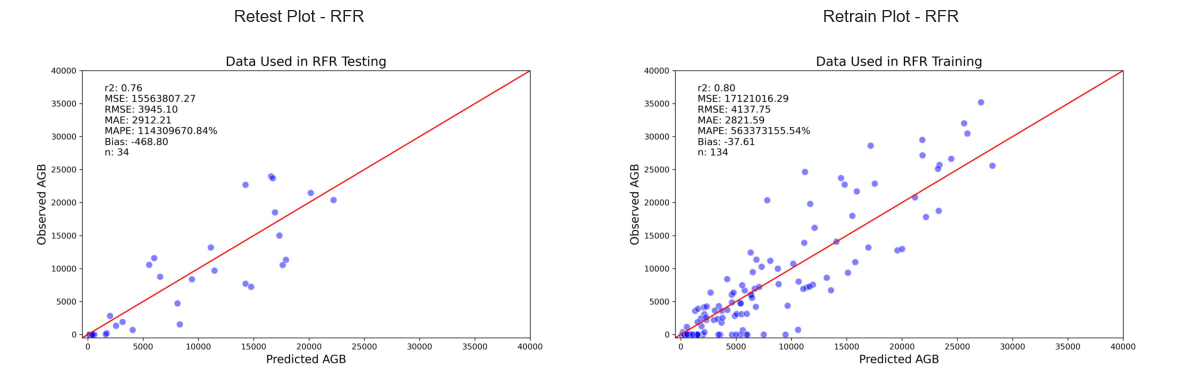

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv
Metrics for Model 'RFR':
 - RMSE: 3945.1
 - MAE: 2912.21
 - Bias: -468.8
 - R²: 0.76
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_RFR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_RFR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_RFR_RMSE_top_12_retest_predicted_data.csv']


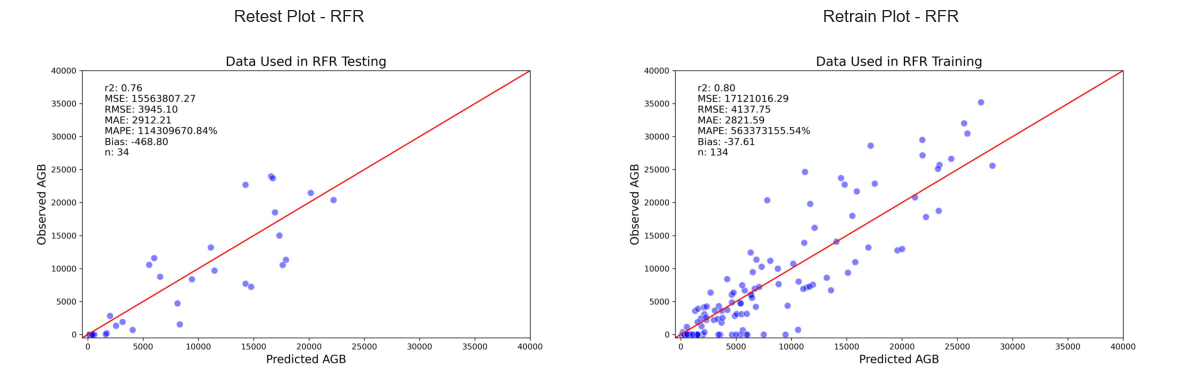

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\RFR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_RFR_RMSE_top_12_retest_metrics.csv
Metrics for Model 'RFR':
 - RMSE: 3945.1
 - MAE: 2912.21
 - Bias: -468.8
 - R²: 0.76
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\ABR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_ABR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_ABR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_ABR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_ABR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_ABR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_ABR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_ABR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_ABR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_ABR_RMSE_top_12_retest_predicted_data.csv']


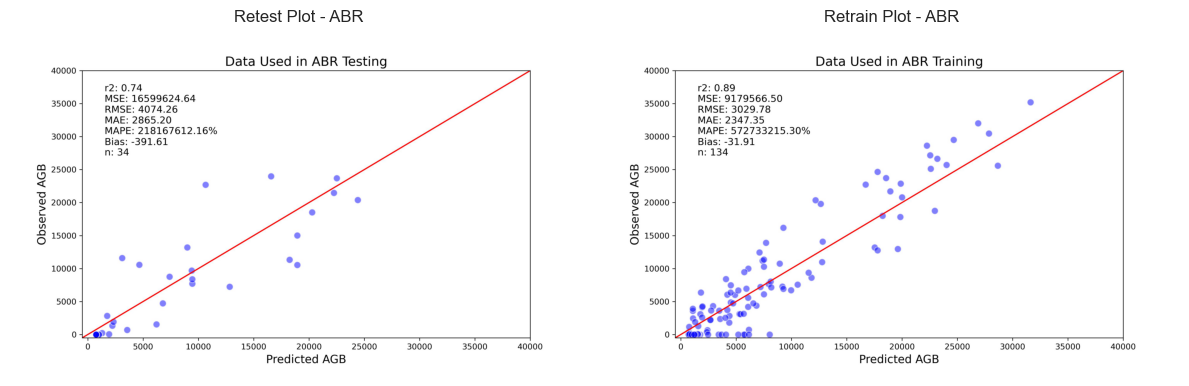

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\ABR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_ABR_RMSE_top_12_retest_metrics.csv
Metrics for Model 'ABR':
 - RMSE: 4074.26
 - MAE: 2865.2
 - Bias: -391.61
 - R²: 0.74
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\ABR\p50\std3\all0\RMSE\sel_num_12': ['AGB_all02_rs10_RMSE_ABR_sel_12_variable_score.csv', 'AGB_all02_rs10_RMSE_ABR_sel_12_variable_correlation.csv', 'AGB_all02_rs10_RMSE_ABR_sel_12_variable_score.JPG', 'AGB_all02_rs10_RMSE_ABR_Top_12_Feature_Importance_Score.JPG', 'AGB_all02_rs10_ABR_RMSE_top_12_retrain.JPG', 'AGB_all02_rs10_ABR_RMSE_top_12_retrain_metrics.csv', 'AGB_all02_rs10_ABR_RMSE_top_12_retest.JPG', 'AGB_all02_rs10_ABR_RMSE_top_12_retest_metrics.csv', 'AGB_all02_rs10_ABR_RMSE_top_12_retest_predicted_data.csv']


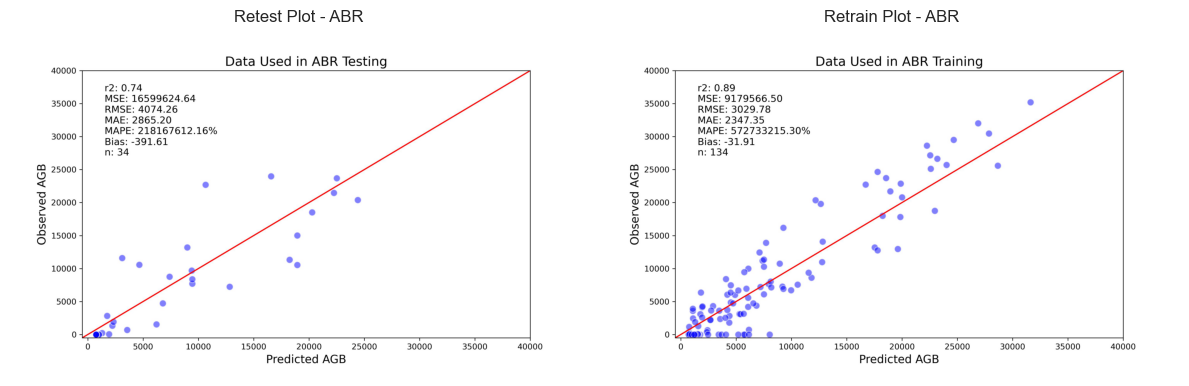

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\ABR\p50\std3\all0\RMSE\sel_num_12\AGB_all02_rs10_ABR_RMSE_top_12_retest_metrics.csv
Metrics for Model 'ABR':
 - RMSE: 4074.26
 - MAE: 2865.2
 - Bias: -391.61
 - R²: 0.74
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\MLP\mean\std3\all0\DEF\sel_num_40': ['AGB_all02_rs10_RMSE_MLP_sel_40_variable_score.csv', 'AGB_all02_rs10_RMSE_MLP_sel_40_variable_correlation.csv', 'AGB_all02_rs10_RMSE_MLP_sel_40_variable_score.JPG', 'AGB_all02_rs10_RMSE_MLP_Top_40_Feature_Importance_Score.JPG', 'AGB_all02_rs10_MLP_RMSE_top_40_retrain.JPG', 'AGB_all02_rs10_MLP_RMSE_top_40_retrain_metrics.csv', 'AGB_all02_rs10_MLP_RMSE_top_40_retest.JPG', 'AGB_all02_rs10_MLP_RMSE_top_40_retest_metrics.csv', 'AGB_all02_rs10_MLP_RMSE_top_40_retest_predicted_data.csv']


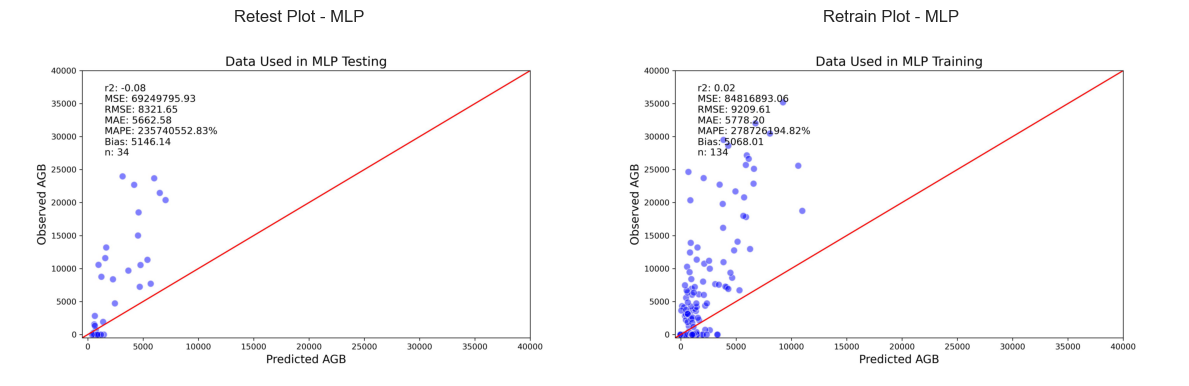

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\MLP\mean\std3\all0\DEF\sel_num_40\AGB_all02_rs10_MLP_RMSE_top_40_retest_metrics.csv
Metrics for Model 'MLP':
 - RMSE: 8321.65
 - MAE: 5662.58
 - Bias: 5146.14
 - R²: -0.08
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\MLP\mean\std3\all0\DEF\sel_num_40': ['AGB_all02_rs10_RMSE_MLP_sel_40_variable_score.csv', 'AGB_all02_rs10_RMSE_MLP_sel_40_variable_correlation.csv', 'AGB_all02_rs10_RMSE_MLP_sel_40_variable_score.JPG', 'AGB_all02_rs10_RMSE_MLP_Top_40_Feature_Importance_Score.JPG', 'AGB_all02_rs10_MLP_RMSE_top_40_retrain.JPG', 'AGB_all02_rs10_MLP_RMSE_top_40_retrain_metrics.csv', 'AGB_all02_rs10_MLP_RMSE_top_40_retest.JPG', 'AGB_all02_rs10_MLP_RMSE_top_40_retest_metrics.csv', 'AGB_all02_rs10_MLP_RMSE_top_40_retest_predicted_data.csv']


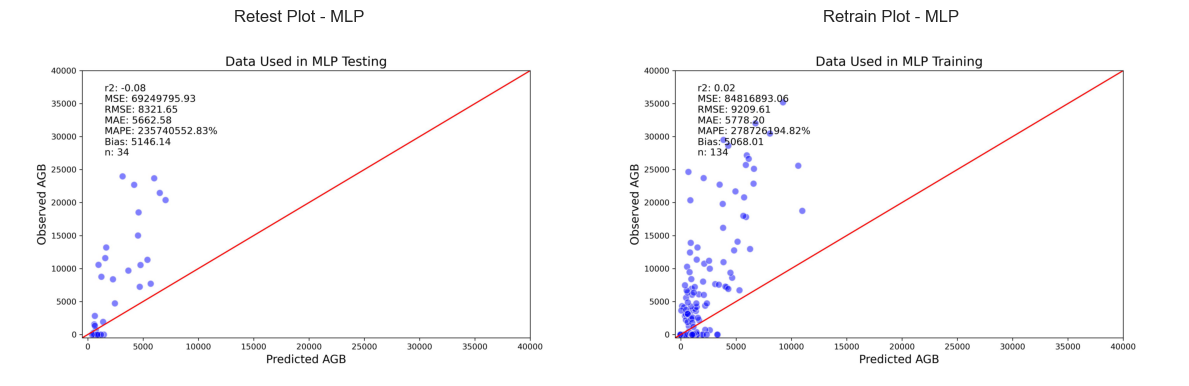

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v5\AGB\all02_rs10\MLP\mean\std3\all0\DEF\sel_num_40\AGB_all02_rs10_MLP_RMSE_top_40_retest_metrics.csv
Metrics for Model 'MLP':
 - RMSE: 8321.65
 - MAE: 5662.58
 - Bias: 5146.14
 - R²: -0.08
--------------------------------------------------
Saved results to C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v5_all02_rs10_overall_top_two.csv


In [44]:
# Get the top 2 performing models for each 'mdl'
top_two_per_model = df_rank.groupby('mdl', as_index=False).apply(lambda x: x.nsmallest(2, 'Rank')).reset_index(drop=True)

# Sort the models by Rank for clear display
top_two_per_model = top_two_per_model.sort_values(by='Rank')

# Output the results
print("Top Two Ranks for Each Model:")
print(top_two_per_model[['mdl', 'rmse', 'mae', 'r2', 'Score', 'Rank', 'csv_path', 'model', 'features']])

# Visualise plots for the top two performing models of each type
for index, row in top_two_per_model.iterrows():
    csv_directory = os.path.dirname(row['csv_path'])

    # Debug: List all files in the directory
    print(f"Files in directory '{csv_directory}': {os.listdir(csv_directory)}")

    # Use glob to find retest and retrain plots
    retest_plot_files = glob.glob(os.path.join(csv_directory, "*retest.JPG"))
    retrain_plot_files = glob.glob(os.path.join(csv_directory, "*retrain.JPG"))

    if retest_plot_files and retrain_plot_files:
        # Take the first matching files
        retest_plot_path = retest_plot_files[0]
        retrain_plot_path = retrain_plot_files[0]

        # Plot the images side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        retest_img = mpimg.imread(retest_plot_path)
        axes[0].imshow(retest_img)
        axes[0].set_title(f"Retest Plot - {row['mdl']}")
        axes[0].axis("off")

        retrain_img = mpimg.imread(retrain_plot_path)
        axes[1].imshow(retrain_img)
        axes[1].set_title(f"Retrain Plot - {row['mdl']}")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

        # Print CSV path and metrics
        print(f"CSV Path: {row['csv_path']}")
        print(f"Metrics for Model '{row['mdl']}':")
        print(f" - RMSE: {row['rmse']}")
        print(f" - MAE: {row['mae']}")
        print(f" - Bias: {row['bias']}")
        print(f" - R²: {row['r2']}")
        print("-" * 50)
    else:
        print(f"Missing plots for model: {row['mdl']}")
        if not retest_plot_files:
            print(" - Retest plot not found.")
        if not retrain_plot_files:
            print(" - Retrain plot not found.")

# Save the top two models per type to a CSV
output_path = r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_overall_top_two.csv".format(model_run, var_)
top_two_per_model.to_csv(output_path, index=False)
print(f"Saved results to {output_path}")


